In [7]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset

In [8]:
class CIFAR10ClientDataset(Dataset):
    def __init__(self, data_path, target_path, transform=None):
        self.data = np.load(data_path)
        self.targets = np.load(target_path)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img = self.data[idx]
        img = img.astype("uint8")

        if self.transform:
            img = self.transform(img)

        return img, int(self.targets[idx])

In [9]:
def load_saved_splits(root_dir):
    """
    Loads all client_* folders inside root_dir.

    Returns:
        client_targets: dict {client_id: np.array of class labels}
    """
    client_targets = {}

    for folder in sorted(os.listdir(root_dir)):
        if folder.startswith("client_"):
            cid = int(folder.split("_")[1])
            target_path = os.path.join(root_dir, folder, "targets.npy")

            if os.path.exists(target_path):
                targets = np.load(target_path)
                client_targets[cid] = targets
                print(f"Loaded Client {cid}: {len(targets)} samples")
            else:
                print(f"WARNING: targets.npy not found for {folder}")

    return client_targets

In [10]:
def plot_client_label_distributions(client_targets, num_classes=10, save_prefix=None):
    """
    Plots per-client bar charts + heatmap given saved label arrays.
    """

    num_clients = len(client_targets)

    # ------------------------------------------------------------
    # 1) Per-client bar plots
    # ------------------------------------------------------------
    n_cols = 2
    n_rows = math.ceil(num_clients / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 3.5 * n_rows), squeeze=False)
    fig.suptitle("Per-Client Label Distributions (Saved Splits)", fontsize=14)

    hist_matrix = []

    for i, cid in enumerate(sorted(client_targets.keys())):
        ax = axes[i // n_cols][i % n_cols]

        labels = client_targets[cid]
        hist = np.bincount(labels, minlength=num_classes)
        hist_matrix.append(hist)

        ax.bar(np.arange(num_classes), hist)
        ax.set_title(f"Client {cid} (n={len(labels)})")
        ax.set_xlabel("Class")
        ax.set_ylabel("Count")
        ax.set_xticks(np.arange(num_classes))

    # Hide unused subplots
    for j in range(i + 1, n_rows * n_cols):
        axes[j // n_cols][j % n_cols].axis("off")

    plt.tight_layout(rect=[0, 0, 1, 0.96])

    if save_prefix:
        plt.savefig(f"{save_prefix}_bars.png", dpi=200)

    plt.show()

In [11]:
client0 = CIFAR10ClientDataset(
    "/local/scratch/a/dalwis/single_agent_RL_for_pFL/data/cifar_10/saved_splits/client_0/data.npy",
    "/local/scratch/a/dalwis/single_agent_RL_for_pFL/data/cifar_10/saved_splits/client_0/targets.npy"
)


Loaded Client 0: 22415 samples
Loaded Client 1: 27585 samples


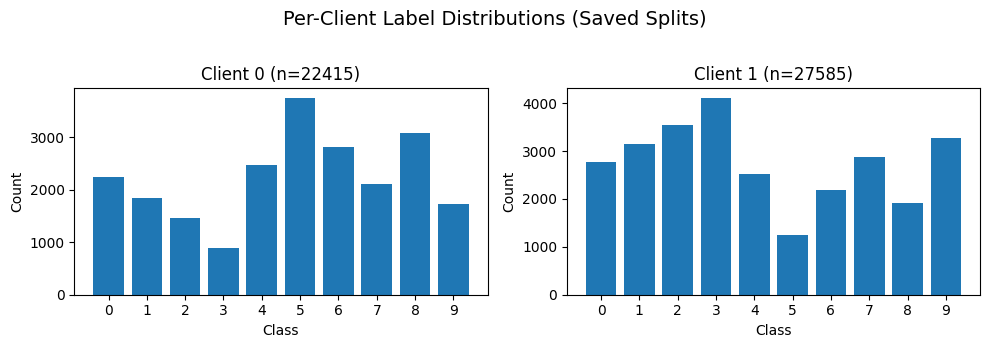

In [12]:
ROOT = "/local/scratch/a/dalwis/single_agent_RL_for_pFL/data/cifar_10/saved_splits"
    
client_targets = load_saved_splits(ROOT)

plot_client_label_distributions(
    client_targets,
    num_classes=10,
    save_prefix="cifar10_saved_split"
)